# Introduction

Real-life classification problems consist of many cases in which the data is not "beautifully" balanced. In such cases, one may find the accuracy score of over 90%, but that may not be the happy ending. This is because we often want to focus only on the minority class, as it plays more important role in such problems. In order to tackle this, we need to come up with proper evaluation metrics and resampling techniques. One of the popular problem regarding imbalanced dataset is Credit Card Fraud Detection. Throughout this problem, we can illustrate well what we need to handle such an imbalanced dataset.

## Brief Information about Dataset

Class: 0 - non-fraud 1 - fraud
Amount: Transaction amount
V1,V2,...,V28: These are anonymous features, due to confidentiality. Additionally, these are numerical values which are results of PCA transformation.
Time: The amount of seconds elapsed between each transaction and the first transaction in the dataset.

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
data = pd.read_csv('/Users/yeezhianliew/Downloads/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
data.isnull().values.any()

False

In [4]:
# Check ratio between classes
percentage_fraud = round((data['Class'].value_counts()[1] / len (data)) * 100, 2)
percentage_no_fraud = round((data['Class'].value_counts()[0] / len(data)) * 100, 2)

print ('Percentage Fraud transactions: ', percentage_fraud)
print ('Percentage No-fraud transactions: ', percentage_no_fraud)

Percentage Fraud transactions:  0.17
Percentage No-fraud transactions:  99.83


# Visualization the Data

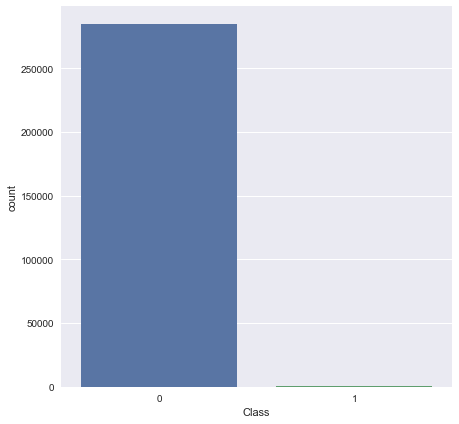

In [5]:
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Class", data=data)

Fraud-transactions occupy only 0.17% of the dataset, this dataset is heavily skewed.



## Min Max Scaling 

In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Get rid of Time and Amount
data.drop(['Time','Amount'], axis=1, inplace=True)

# Let's look at the data again !
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## Resampling Techniques
There are various techniques implemented for dealing with imbalanced dataset. Some popular strategies include improving classification algorithm to fit better with imbalanced dataset, or balancing the classes of training data before providing data as input to the algorithm (data resampling techniques). The second technique is more preferable as it has wider application.

Some popular resampling techniques including:

1)Random undersampling - UnderSample from imlearn
    
2)Random oversampling -SMOTE (Synthetic Minority Over-sampling Technique)

3)Combine both together


## Sampling Explanation 
Despite the advantage of balancing classes, these techniques also have their weaknesses. The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. Whereas in under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [8]:
X = data.drop ('Class', axis = 1)
y = data['Class']

from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

## Train Test Split

As the total number of training transactions is too large, which may damage my computer. So I obtain the smaller training dataset with the same ratio of classes of original training dataset. This newly created training dataset is treated as originally skewed training data from this point.

In [9]:
training_data = pd.concat ([X_train,y_train],axis = 1)
training_data['Class'].value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [10]:
print ('Percentage original fraud: ', percentage_fraud)
print ('Percentage original no-fraud: ', percentage_no_fraud)
number_of_instances = 100000
# We will obtain maximum 100.000 data instances with the same class ratio of original data.
# Therefore, new data will have 0.17% fraud and 99.83% non-fraud of 100.000.
# Which means, new data will have 170 fraud transactions and 99830 non-fraud transactions.

number_sub_fraud = int (percentage_fraud/100 * number_of_instances)
number_sub_non_fraud = int (percentage_no_fraud/100 * number_of_instances)

sub_fraud_data = training_data[training_data['Class'] == 1].head(number_sub_fraud)
sub_non_fraud_data = training_data[training_data['Class'] == 0].head(number_sub_non_fraud)

print ('Number of newly sub fraud data:',len(sub_fraud_data))
print ('Number of newly sub non-fraud data:',len(sub_non_fraud_data))

sub_training_data = pd.concat ([sub_fraud_data, sub_non_fraud_data], axis = 0)
sub_training_data['Class'].value_counts()

Percentage original fraud:  0.17
Percentage original no-fraud:  99.83
Number of newly sub fraud data: 170
Number of newly sub non-fraud data: 99830


0    99830
1      170
Name: Class, dtype: int64

In [11]:
X_train_sub = sub_training_data.drop ('Class', axis = 1)
y_train_sub = sub_training_data['Class']
y_train_sub.value_counts()

0    99830
1      170
Name: Class, dtype: int64

## Randomly Under-Sampling the Training Dataset
For simplicity, i use DataFrame.sample() to randomly sample the instances of each class:

In [ ]:
from imblearn.under_sampling import RandomUnderSample

under_algo = RandomUnderSample (random_state = 0)
X_train_sub, y_train_sub= under_algo.fit_sample(X_train, y_train)
X_train_sub = pd.DataFrame(data = X_train_sub, columns = X_train.columns)
y_train_sub = pd.DataFrame(data = y_train_sub, columns = ['Class'])


plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Class", data=y_train_sub)

## Randomly Over-Sampling the Training Dataset
I do the same with over-sampling technique.

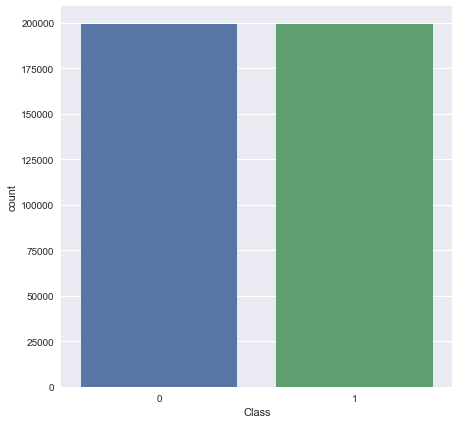

In [40]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

smote_algo = SMOTE (random_state = 0)
X_train_sub, y_train_sub= smote_algo.fit_sample(X_train, y_train)
X_train_sub = pd.DataFrame(data = X_train_sub, columns = X_train.columns)
y_train_sub = pd.DataFrame(data = y_train_sub, columns = ['Class'])


plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Class", data=y_train_sub)

## Evaluation Metrics in case of Imbalanced Dataset
This is a clear example where using a typical accuracy score is no longer appropriate. For example, within this dataset, if we just assign all the class to Non-fraud transactions, we can barely have accuracy score of 99.83% since the original data has 99.83% of non-fraud transactions.
On the other hand, we are very interested in the Recall score, because that is the metric that will help us try to capture the most fraudulent transactions.

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
TP: True Positives
FP: False Positives
FN: False Negatives
Where:

TP: actually Fraud and predicted as Fraud
FP: actually Fraud but predicted as Normal
TN: actually Normal and predicted as Normal
FN: actually Normal but predicted as Fraud

In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
svc = SVC()
lr = LogisticRegression()
svc.fit(X_train_sub, y_train_sub)
#Logistic Regression
lr.fit(X_train_sub, y_train_sub)

# Note: We should test on the original skewed test set
predictions_svm = svc.predict(X_test)
predictions_lr = lr.predict(X_test)

# Compute confusion matrix
cnf_matrix_svm = confusion_matrix(y_test,predictions_svm)
cnf_matrix_lr = confusion_matrix(y_test,predictions_lr)

recall_svm = cnf_matrix_svm[1,1]/(cnf_matrix_svm[1,0]+cnf_matrix_svm[1,1])
recall_lr = cnf_matrix_lr[1,1]/(cnf_matrix_lr[1,0]+cnf_matrix_lr[1,1])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
print (cnf_matrix_svm)

[[85292     3]
 [   77    71]]


In [31]:
print (cnf_matrix_lr)

[[85281    14]
 [   54    94]]


In [32]:
print (recall_svm,recall_lr)

0.4797297297297297 0.6351351351351351


# Conclusion 

After running all the codes above, here are the Recall scores that I obtained:

Original Data (Imbalanced)Undersampled DataOversampled DataSVM47.9789.8655.4Logistic Regression63.5189.8689.18

For the original skewed dataset, both of the models perform badly. However, with Undersampled data, the Recall scores increase significantly in case of both classifiers. It is noticeable that with Oversampled data, only Logistic Regression can significantly increase the Recall, whereas SVM only slightly enhance it.